In [1]:
# imports

import tensorflow as tf
from tensorflow.keras import datasets,layers, models
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Flatten,Dropout,Input, AveragePooling2D, Activation,Conv2D, MaxPooling2D, BatchNormalization,Concatenate
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
from tensorflow.keras import regularizers, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

In [11]:
class FashionMNIST_CNN():
    def __init__(self, epochs):
        self.class_names = ["T-shirt/Top", "Trouser", "Pullover", "Dress", "Coat", \
                            "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]
        self.epochs = epochs
        
    def fetch_data(self):
        dataset = tf.keras.datasets.fashion_mnist.load_data()
        (self.train_images, self.train_labels), (self.test_images, self.test_labels) = dataset
        self.print_shape()
        self.classes = np.unique(self.train_labels)
        self.nClasses = len(self.classes)
        print("Total number of clases: ", self.nClasses)
        print("Target Classes: ", self.classes)
        
    def print_shape(self):
        print("Training Data Shape: ", self.train_images.shape, self.train_labels.shape)
        print("Testing Data Shape: ", self.test_images.shape, self.test_labels.shape)
    
    def example_data(self, n):
        plt.figure(figsize=(10,10))
        for i in range(n):
            plt.subplot(5,5,i+1)
            plt.xticks([])
            plt.yticks([])
            plt.grid(False)
            plt.imshow(self.train_images[i], cmap=plt.cm.binary)
            plt.xlabel(self.class_names[self.train_labels[i]]).set_color('white')
        plt.show()
        
    def model_start(self):
        self.preprocess()
        self.model_create()
        self.model_summary()
        var = self.model_compile()
        print("Model Creation Done")
    
    def preprocess(self):
        self.train_images = self.train_images.reshape((self.train_images.shape[0], 28, 28, 1))
        self.test_images = self.test_images.reshape((self.test_images.shape[0], 28, 28, 1))
        nRows, nCols, nDims = self.train_images.shape[1:]
        self.train_data = self.train_images.reshape(self.train_images.shape[0], nRows, nCols, nDims)
        self.test_data = self.test_images.reshape(self.test_images.shape[0], nRows, nCols, nDims)
        self.input_shape = (nRows, nCols, nDims)

        self.train_data = self.train_data.astype('float32')
        self.test_data = self.test_data.astype('float32')

        self.train_data /= 255
        self.test_data /= 255

        self.train_label_one_hot = to_categorical(self.train_labels)
        self.test_label_one_hot = to_categorical(self.test_labels)
        
    def model_create(self):
        self.model = Sequential()
        self.model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', \
                              padding='same', input_shape=self.input_shape))
        self.model.add(BatchNormalization())
        self.model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', \
                              padding='same'))
        self.model.add(BatchNormalization())
        self.model.add(MaxPool2D((2, 2)))
        
        self.model.add(Flatten())
        self.model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
        self.model.add(BatchNormalization())
        self.model.add(Dropout(0.5))
        self.model.add(Dense(self.nClasses, activation='softmax'))
        
    def model_summary(self):
        self.model.summary()
            
    def model_compile(self):
        opt = optimizers.SGD(lr=0.01, momentum=0.9)
        self.model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
        return 0
    
    def train(self):
        self.history = self.model.fit(self.train_data, self.train_label_one_hot, epochs=self.epochs, \
                                      validation_data=(self.test_data, self.test_label_one_hot))

    def model_evaluate(self):
        self.test_loss, self.test_acc = self.model.evaluate(self.test_data,  self.test_label_one_hot, verbose=2)

        print("Test Accuracy: ", self.test_acc)
        

In [12]:
model = FashionMNIST_CNN(15)
model.fetch_data()

Training Data Shape:  (60000, 28, 28) (60000,)
Testing Data Shape:  (10000, 28, 28) (10000,)
Total number of clases:  10
Target Classes:  [0 1 2 3 4 5 6 7 8 9]


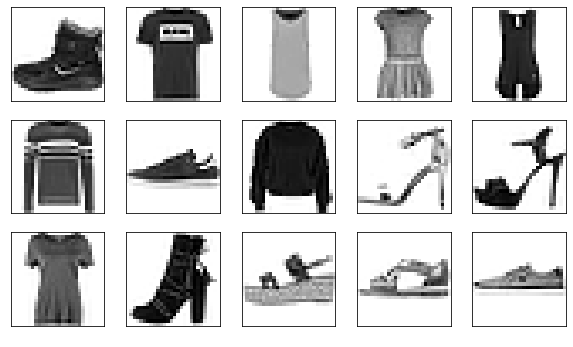

In [13]:
model.example_data(15)

In [14]:
model.model_start()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               8

In [15]:
model.train()

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 14s 240us/sample - loss: 0.4464 - accuracy: 0.8426 - val_loss: 0.4721 - val_accuracy: 0.8517
Epoch 2/15
60000/60000 [==============================] - 10s 159us/sample - loss: 0.3025 - accuracy: 0.8923 - val_loss: 1.2066 - val_accuracy: 0.6135
Epoch 3/15
60000/60000 [==============================] - 9s 155us/sample - loss: 0.2757 - accuracy: 0.9019 - val_loss: 0.3739 - val_accuracy: 0.8733
Epoch 4/15
60000/60000 [==============================] - 9s 157us/sample - loss: 0.2335 - accuracy: 0.9164 - val_loss: 0.2810 - val_accuracy: 0.9053
Epoch 5/15
60000/60000 [==============================] - 10s 159us/sample - loss: 0.2093 - accuracy: 0.9237 - val_loss: 0.2403 - val_accuracy: 0.9148
Epoch 6/15
60000/60000 [==============================] - 10s 161us/sample - loss: 0.1959 - accuracy: 0.9294 - val_loss: 0.2752 - val_accuracy: 0.9072
Epoch 7/15
60000/60000 [======================

In [16]:
model.model_evaluate()

10000/10000 - 1s - loss: 0.2658 - accuracy: 0.9194
Test Accuracy:  0.9194


Add this to the class
```
    def predict_new(self, image_path):
        img=mpimg.imread(image_path)
        ret_class = class_names[self.model.predict(np.expand_dims(img,axis=0)).argmax()]
        print(ret_class)
        return ret_class
    
    def model_save(self):
        self.model.save('model')
        
    def model_load(self):
        self.model = tf.keras.models.load_model('model')
```